<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [3]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#printing first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#printing the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#counting empty columns
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
# counting number of columns and rows
gold_data.shape

(2290, 6)

In [8]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold_data['Date'] = gold_data['Date'].replace({'/':''}, regex=True)
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,122008,1447.160034,84.860001,78.470001,15.180,1.471692
1,132008,1447.160034,85.570000,78.370003,15.285,1.474491
2,142008,1411.630005,85.129997,77.309998,15.167,1.475492
3,172008,1416.180054,84.769997,75.500000,15.053,1.468299
4,182008,1390.189941,86.779999,76.059998,15.590,1.557099


**Correlation**


1.   **Positive Correlation**
2.   **Negative Correlation**



In [11]:
correlation = gold_data.corr()

<Axes: >

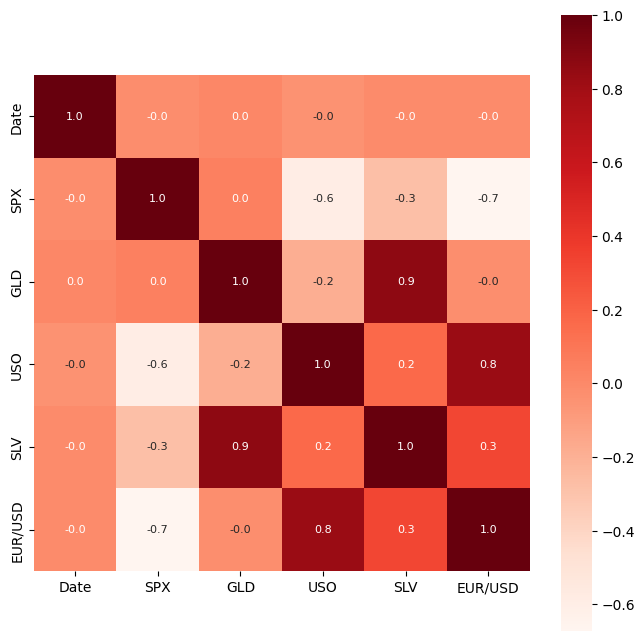

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.012484
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


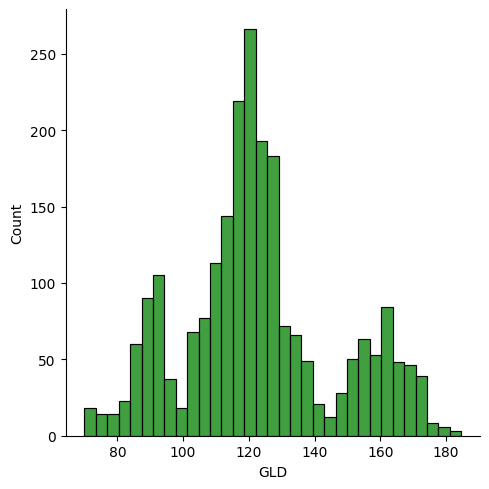

In [14]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'], color='green')

**Splitting the Features and the Target**

In [15]:
X = gold_data.drop(['GLD', 'Date'],  axis = 1)
Y = gold_data['GLD']

**Splittin the training and test data**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

**Model Training:**
**Random Forrest Regressor**

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
# prediction on train data
train_data_prediction = regressor.predict(X_train)
# R squared error
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.99846680423436


In [19]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.63089908  82.13419993 116.11610006 127.45240085 120.71760106
 154.68759783 150.43029841 126.00150014 117.4222988  125.95020082
 116.49370134 171.66530104 141.27629855 167.93199901 115.16030016
 117.48060043 138.88990279 170.04210001 159.77450284 160.39979972
 154.88519984 125.11349995 176.08959894 157.31560306 125.15320041
  93.72449961  77.65729987 120.50640008 119.03799914 167.56520008
  88.42450051 125.12599969  91.08570073 117.74660005 120.94859885
 136.76480124 115.54580084 115.5986005  148.39940004 107.43650124
 104.18620246  87.24459775 126.45840046 118.1757004  153.0043993
 119.63429979 108.45280012 108.13629835  93.28350086 127.18199742
  75.22140034 113.65289917 121.16199991 111.26459932 118.96169899
 120.61899919 159.20069969 168.28740065 146.75919644  85.70669826
  94.4463004   86.89709893  90.50530035 118.88510062 126.50170088
 127.4949     170.98000081 122.27949949 117.38469887  98.62570022
 168.28210144 143.27199943 132.20950206 121.1212019  121.04909956
 119.629300

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892064080475431


**Compare the actual and predicted values in a Plot**

In [22]:
Y_test = list(Y_test)

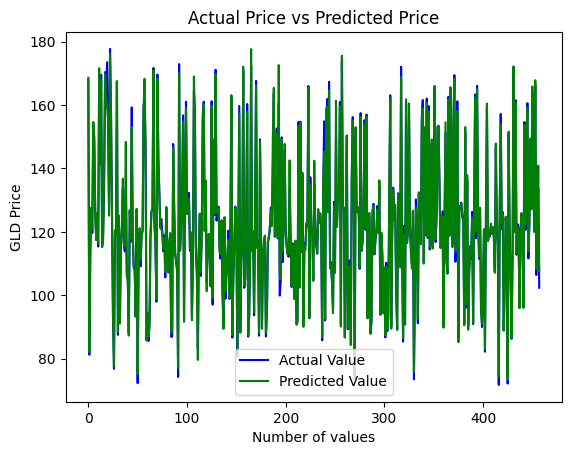

In [23]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

**Checking the performance of other models**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
gb_regressor.fit(X_train, Y_train)
gb_train_prediction = gb_regressor.predict(X_train)
gb_test_prediction = gb_regressor.predict(X_test)
gb_train_error_score = metrics.r2_score(Y_train, gb_train_prediction)
gb_test_error_score = metrics.r2_score(Y_test, gb_test_prediction)
print("Gradient Boosting R squared error (Train):", gb_train_error_score)
print("Gradient Boosting R squared error (Test):", gb_test_error_score)

# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2)
xgb_regressor.fit(X_train, Y_train)
xgb_train_prediction = xgb_regressor.predict(X_train)
xgb_test_prediction = xgb_regressor.predict(X_test)
xgb_train_error_score = metrics.r2_score(Y_train, xgb_train_prediction)
xgb_test_error_score = metrics.r2_score(Y_test, xgb_test_prediction)
print("XGBoost R squared error (Train):", xgb_train_error_score)
print("XGBoost R squared error (Test):", xgb_test_error_score)

# LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=2)
lgb_regressor.fit(X_train, Y_train)
lgb_train_prediction = lgb_regressor.predict(X_train)
lgb_test_prediction = lgb_regressor.predict(X_test)
lgb_train_error_score = metrics.r2_score(Y_train, lgb_train_prediction)
lgb_test_error_score = metrics.r2_score(Y_test, lgb_test_prediction)
print("LightGBM R squared error (Train):", lgb_train_error_score)
print("LightGBM R squared error (Test):", lgb_test_error_score)

# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, Y_train)
lr_train_prediction = lr_regressor.predict(X_train)
lr_test_prediction = lr_regressor.predict(X_test)
lr_train_error_score = metrics.r2_score(Y_train, lr_train_prediction)
lr_test_error_score = metrics.r2_score(Y_test, lr_test_prediction)
print("Linear Regression R squared error (Train):", lr_train_error_score)
print("Linear Regression R squared error (Test):", lr_test_error_score)

Gradient Boosting R squared error (Train): 0.9874638191290153
Gradient Boosting R squared error (Test): 0.9763931074735107
XGBoost R squared error (Train): 0.9870604894916082
XGBoost R squared error (Test): 0.9784926176071167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 4
[LightGBM] [Info] Start training from score 122.809476
LightGBM R squared error (Train): 0.9968930386360761
LightGBM R squared error (Test): 0.9884855412506846
Linear Regression R squared error (Train): 0.8850695972446934
Linear Regression R squared error (Test): 0.8657886565869237
